# Labwork 2 : Regression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [10]:
f = open("data/data-regression.csv")

f.readline()  # skip the header line (X,Y)
data = np.loadtxt(f, delimiter=',')

print(data)

[[ 5.8974  9.5513]
 [10.2564  9.5513]
 [10.7692 11.0897]
 [12.5641 15.3205]
 [13.0769 17.6282]
 [16.4103 19.9359]
 [22.8205 29.9359]
 [26.1538 17.2436]
 [28.9744 21.859 ]
 [29.2308 29.9359]
 [36.4103 33.7821]
 [41.5385 32.6282]
 [32.5641 44.9359]
 [42.3077 46.0897]
 [46.1538 44.5513]
 [51.2821 44.1667]
 [45.1282 53.0128]
 [54.8718 62.2436]
 [55.1282 49.9359]
 [59.4872 53.0128]
 [52.5641 54.1667]
 [62.3077 60.3205]
 [57.6923 66.4744]
 [65.641  68.7821]
 [72.5641 68.3974]
 [60.7692 66.0897]
 [71.7949 74.5513]
 [66.9231 77.6282]
 [79.7436 73.3974]
 [77.9487 80.3205]
 [88.7179 76.859 ]
 [84.8718 83.7821]
 [91.2821 84.9359]
 [93.8462 92.6282]
 [98.9744 84.5513]
 [98.4615 89.1667]]


In [11]:
data.shape

(36, 2)

[0, 100, 0, 100]

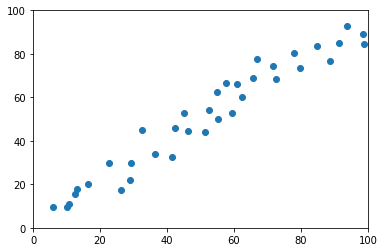

In [12]:
plt.scatter(data[:,0], data[:,1])
plt.axis([0, 100, 0, 100])

[0, 100, 0, 100]

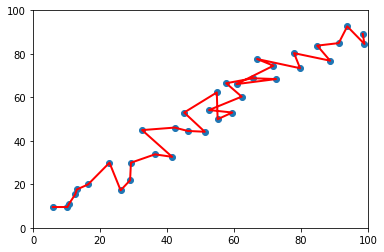

In [13]:
plt.scatter(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,1], color='red', linewidth=2)
plt.axis([0, 100, 0, 100])

In [14]:
X = data[:,0]
Y = data[:,1]
print(X)
print(Y)

[ 5.8974 10.2564 10.7692 12.5641 13.0769 16.4103 22.8205 26.1538 28.9744
 29.2308 36.4103 41.5385 32.5641 42.3077 46.1538 51.2821 45.1282 54.8718
 55.1282 59.4872 52.5641 62.3077 57.6923 65.641  72.5641 60.7692 71.7949
 66.9231 79.7436 77.9487 88.7179 84.8718 91.2821 93.8462 98.9744 98.4615]
[ 9.5513  9.5513 11.0897 15.3205 17.6282 19.9359 29.9359 17.2436 21.859
 29.9359 33.7821 32.6282 44.9359 46.0897 44.5513 44.1667 53.0128 62.2436
 49.9359 53.0128 54.1667 60.3205 66.4744 68.7821 68.3974 66.0897 74.5513
 77.6282 73.3974 80.3205 76.859  83.7821 84.9359 92.6282 84.5513 89.1667]


In [15]:
X = X.reshape(-1, 1)
print(X)

[[ 5.8974]
 [10.2564]
 [10.7692]
 [12.5641]
 [13.0769]
 [16.4103]
 [22.8205]
 [26.1538]
 [28.9744]
 [29.2308]
 [36.4103]
 [41.5385]
 [32.5641]
 [42.3077]
 [46.1538]
 [51.2821]
 [45.1282]
 [54.8718]
 [55.1282]
 [59.4872]
 [52.5641]
 [62.3077]
 [57.6923]
 [65.641 ]
 [72.5641]
 [60.7692]
 [71.7949]
 [66.9231]
 [79.7436]
 [77.9487]
 [88.7179]
 [84.8718]
 [91.2821]
 [93.8462]
 [98.9744]
 [98.4615]]


In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

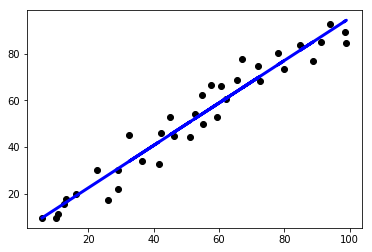

In [17]:
Y_pred = regr.predict(X)

plt.scatter(X, Y,  color='black')
plt.plot(X, Y_pred, color='blue', linewidth=3)

plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

poly =  make_pipeline(PolynomialFeatures(degree=3), Ridge())

poly.fit(X, Y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

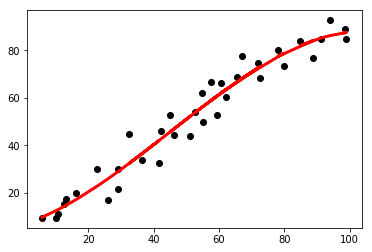

In [19]:
Y_pred2 = poly.predict(X)

plt.scatter(X, Y,  color='black')
plt.plot(X, Y_pred2, color='red', linewidth=3)

plt.show()

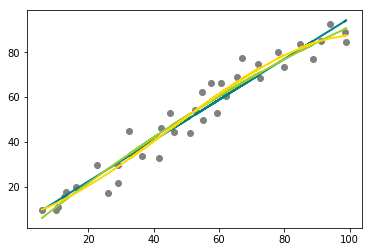

In [20]:
colors = ['teal', 'yellowgreen', 'gold']
plt.scatter(X, Y,  color='gray')

for count, degree in enumerate([1, 2, 3]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, Y)
    y_plot = model.predict(X)
    plt.plot(X, y_plot, color=colors[count], linewidth=2,
             label="degree %d" % degree)
    
plt.show()